In [8]:
import spacy
nlp= spacy.load('en_core_web_lg')
stop_words= nlp.Defaults.stop_words

In [111]:
import pandas as pd
import numpy as np
imdb= pd.read_csv('imdb_labelled.txt',sep='\t',header=None,names=['comments','labels'])
amazon= pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None,names=['comments','labels'])
yelp= pd.read_csv('yelp_labelled.txt',sep='\t',header=None,names=['comments','labels'])
data= pd.concat([imdb,amazon,yelp],axis=0,ignore_index=True)

In [152]:
data.head()

,comments,labels,processed
0,"A very, very, very slow-moving, aimless movie ...",0,"a , , slow - move , aimless movie distressed ,..."
1,Not sure who was more lost - the flat characte...,0,"not sure lose - flat character audience , near..."
2,Attempting artiness with black & white and cle...,0,attempt artiness black & white clever camera a...
3,Very little music or anything to speak of.,0,very little music speak .
4,The best scene in the movie was when Gerardo i...,1,the good scene movie Gerardo try find song kee...


In [172]:
def preprocess(text):
    tokens=""
    for token in nlp(text):
        if token.text not in stop_words and token.is_alpha:
            tokens+= " "+ token.lemma_
    return tokens.strip()

In [173]:
data['processed']= data['comments'].apply(preprocess)


In [174]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer,TfidfVectorizer

In [176]:
courpose= data['processed'].values.tolist()

In [177]:
u_words= set()
for row in courpose:
    if type(row)==str:
        for word in nlp(row):
            if word.text not in u_words:
                u_words.add(word.text)
            

        

In [178]:
len(u_words)

4402

In [179]:
count_vectorizer= CountVectorizer()
tf_idf= TfidfVectorizer()
# count_vectorizer.fit(courpose)
tf_idf.fit(courpose)

TfidfVectorizer()

In [180]:
# x_count=count_vectorizer.transform(courpose)
x_tf_idf=tf_idf.transform(courpose)
y=data['labels'].values

In [181]:
from sklearn.model_selection import train_test_split 

In [182]:
x_train,x_test,y_train,y_test= train_test_split(x_tf_idf,y,test_size=0.3,random_state=8)

In [183]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [184]:
y_pred = classifier.predict(x_test)

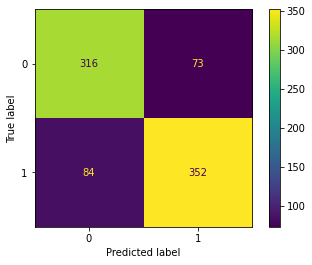

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [213]:
#processed
courpose= data['comments'].values.tolist()
x_data=[]
for row in courpose:
    x_data.append(nlp(row).vector)
    

In [214]:
from sklearn.preprocessing import MinMaxScaler
x_scale= MinMaxScaler().fit_transform(x_data)

In [215]:
x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size=0.3,random_state=8)

In [216]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [217]:
y_pred = classifier.predict(x_test)

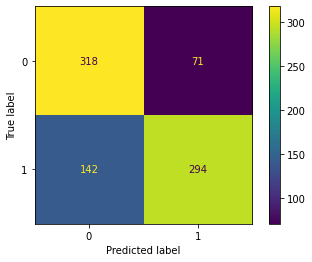

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

# Tensorflow hub

In [37]:
import tensorflow_hub as tf_hub
import numpy as np
embed = tf_hub.load("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2")


In [38]:
embed(['Saeed is someone import','Saba is very famouse'])

<tf.Tensor: shape=(2, 128), dtype=float32, numpy=
array([[ 1.19303755e-01, -7.97779784e-02, -1.05061367e-01,
        -4.60052490e-02, -1.03377894e-01, -1.19882353e-01,
         1.32575277e-02, -3.70303988e-02, -4.56295647e-02,
        -6.94633126e-02,  1.26856402e-01, -1.73230499e-01,
         1.24067210e-01, -1.83341280e-02, -1.72644570e-01,
        -7.55827576e-02,  1.08751822e-02, -6.95268288e-02,
        -4.90530357e-02, -2.89622918e-02, -6.49142936e-02,
         3.49781029e-02,  5.69012016e-03, -5.08241095e-02,
         5.19027933e-03, -1.37000367e-01,  1.12557739e-01,
        -3.69356424e-02,  1.61482692e-01,  1.15671083e-01,
         8.16249773e-02,  5.26726320e-02, -4.45199758e-03,
         5.45632131e-02,  1.10655315e-02, -6.21444248e-02,
        -1.35635704e-01,  1.26971513e-01, -3.44119668e-02,
        -3.16835940e-02,  6.18359298e-02,  1.10200336e-02,
        -1.46284178e-02, -1.81245059e-01, -1.33162048e-02,
         1.04141183e-01,  8.37570652e-02, -1.32890314e-01,
      

In [39]:
nlp('soccer is my favourit sport while footbal is bullshit').similarity(nlp('I love playing soccer and I hate playing football'))

0.8016519226102806

In [20]:
def cosine(a,b):
    return np.dot(a,b)/(np.sqrt(np.square(a).sum()*np.square(b).sum()))


In [40]:
a=list(embed(['soccer is my favourit sport while footbal is bullshit']).numpy().reshape(-1))
b= list(embed(['I love playing soccer and I hate playing football']).numpy().reshape(-1))
cosine(a,b)

0.5099477

In [17]:
np.square([1,2,3]).sum()

14

In [67]:
import tensorflow_datasets as tfds
from tqdm import tqdm

In [42]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\sahmadian\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [68]:
maximum=0
idx=0
# sent=''
for i,row in tqdm(enumerate(train_data[0])):
    if len(row.numpy())> maximum:
#         print(sent)
#         print('---------------------------------------------')
#         print('---------------------------------------------')
        sent = row.numpy()
        maximum= len(sent)
        idx=i


25000it [00:17, 1451.64it/s]


In [69]:
sent

b'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, b

In [72]:
train_data[0][idx]

<tf.Tensor: shape=(), dtype=string, numpy=b'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which

In [222]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [231]:
seq_length=4
batch_size=32
k=6
inp=torch.arange(seq_length).repeat(batch_size).view(batch_size,seq_length)

In [236]:
inp[0:5,:]

tensor([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]])

In [233]:
pos_emb = nn.Embedding(seq_length, k)

In [235]:
pos_emb(torch.arange(seq_length))

tensor([[ 0.6195, -0.1215,  0.6158,  0.9613, -1.6325, -0.3447],
        [-1.3962,  1.3777,  0.6368,  2.0780, -0.4382,  1.0186],
        [ 1.0375,  0.4917, -0.1731,  0.9803,  0.2668,  0.3442],
        [-0.6150, -0.0410, -1.0315,  1.9994, -1.2834, -0.2950]],
       grad_fn=<EmbeddingBackward0>)

In [244]:
t=3
indices=torch.triu_indices(t, t, offset=1)

In [239]:
torch.triu_indices(t, t, offset=1)[1]

tensor([1, 2, 2])

In [243]:
a= torch.ones(1,3,3)

In [245]:
a[:, indices[0], indices[1]] = float('-inf')

In [246]:
a

tensor([[[1., -inf, -inf],
         [1., 1., -inf],
         [1., 1., 1.]]])